In [2]:
from sklearn.datasets import load_breast_cancer
boston=load_breast_cancer()
x=boston.data
y=boston.target
print(x.shape)
print(y)

(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

In [5]:
import pandas as pd
pd.DataFrame(y).value_counts()

1    357
0    212
dtype: int64

In [9]:
import numpy as np
np.unique(y)
print((y==0).sum())
print((y==1).sum())

212
357


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Testing Acc=',accuracy_score(y_test,y_pred))

Testing Acc= 0.9423558897243107


In [17]:
#RF,ETC
fe=rf.feature_importances_

In [18]:
for i,j in zip(range(0,x.shape[1]),fe):
    print('Feature ',i,'Importance=',j)

Feature  0 Importance= 0.06638024871536513
Feature  1 Importance= 0.011149907692666114
Feature  2 Importance= 0.06215267699839797
Feature  3 Importance= 0.03594178056768028
Feature  4 Importance= 0.0037473319974598157
Feature  5 Importance= 0.009061450218399238
Feature  6 Importance= 0.08497544079585533
Feature  7 Importance= 0.14897616055422563
Feature  8 Importance= 0.004392912884794671
Feature  9 Importance= 0.0011904726574868255
Feature  10 Importance= 0.015623819732649697
Feature  11 Importance= 0.005482957886537668
Feature  12 Importance= 0.013590715105562357
Feature  13 Importance= 0.045420725983501525
Feature  14 Importance= 0.0017578406844074856
Feature  15 Importance= 0.00406211383096593
Feature  16 Importance= 0.0022985903629924817
Feature  17 Importance= 0.003998453937647606
Feature  18 Importance= 0.003085464888349332
Feature  19 Importance= 0.002379682166070254
Feature  20 Importance= 0.09375029655709806
Feature  21 Importance= 0.013214404383626208
Feature  22 Importance=

<BarContainer object of 30 artists>

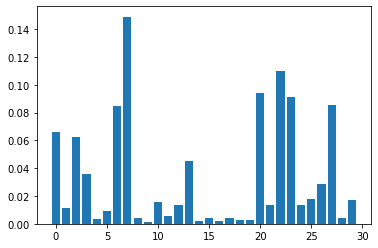

In [19]:
import matplotlib.pyplot as plt
plt.bar(range(0,x.shape[1]),fe)

In [23]:
###Feature Selection
from sklearn.feature_selection import SelectFromModel
model=RandomForestClassifier().fit(x,y)
fs=SelectFromModel(model,prefit=True)
x_new=fs.transform(x)
print(x.shape)
print(x_new.shape)

(569, 30)
(569, 11)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,train_size=0.3,random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Testing Acc=',accuracy_score(y_test,y_pred))

Testing Acc= 0.9398496240601504


In [26]:
from sklearn.metrics import classification_report
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       146
           1       0.95      0.96      0.95       253

    accuracy                           0.94       399
   macro avg       0.94      0.93      0.93       399
weighted avg       0.94      0.94      0.94       399



In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x_new=SelectKBest(chi2,k=5).fit_transform(x,y)
print(x_new.shape)

(569, 5)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,train_size=0.3,random_state=123)
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Testing Acc=',accuracy_score(y_test,y_pred))

Testing Acc= 0.924812030075188


In [30]:
###Feature Extractiom
from sklearn.decomposition import PCA
pca=PCA(n_cmponents=5)
pca.fit(x_train)
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)
rf= RandomForestClassifier()
rf.fit(x_train_pca,y_train)
y_pred=rf.predict(x_test_pca)
from sklearn.metrics import accuracy_score
print('Testing Acc=',accuracy_score(y_test,y_pred))


TypeError: __init__() got an unexpected keyword argument 'n_cmponents'